In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [2]:
def bi_normal_corr(n=100, rho=0.9, mean=[0, 0]):
    """
    n: int, the number of total samples
    rho: float, the correlation
    mean: a list of the expectations for each variable
    """
    cov = [[1, rho], [rho, 1]] 
    x, y = np.random.multivariate_normal(mean, cov, n).T
    return x, y

In [3]:
def plot_scatters(
    x, y,
    ax=None,
    figsize=(3, 3),
    xlabel='x',
    ylabel='y',
    title='',
    fontsize=14,
    **kwargs
):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(x, y, marker='.', **kwargs)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    return ax

In [4]:
def plot_scatters_with_corr(
    x, y,
    func_corr=pearsonr,
    ax=None,
    **kwargs
):
    corr, pval = func_corr(x, y)
    title = f'corr={corr:.2f}\n p={pval:.2e}'
    return plot_scatters(x, y, title=title, ax=ax, **kwargs)

<AxesSubplot:title={'center':'corr=0.49\n p=6.30e-03'}, xlabel='x', ylabel='y'>

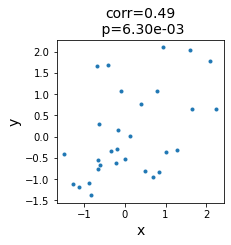

In [5]:
# example 1
x, y = bi_normal_corr(30, 0.5)
plot_scatters_with_corr(x, y, )

<AxesSubplot:title={'center':'corr=0.98\n p=5.39e-22'}, xlabel='exp(x)', ylabel='exp(y)'>

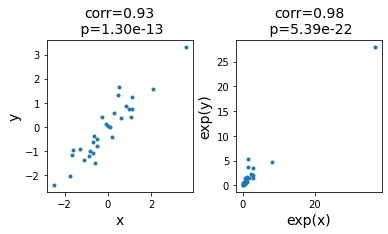

In [6]:
# example 2
x, y = bi_normal_corr(30, 0.8)
x_new, y_new = np.exp(x), np.exp(y)
fig, axs = plt.subplots(1, 2, figsize=(6, 2.8), gridspec_kw={'wspace': 0.3})
plot_scatters_with_corr(x, y, ax=axs[0])
plot_scatters_with_corr(x_new, y_new, xlabel='exp(x)', ylabel='exp(y)', ax=axs[1])

## 真假相关性

所谓的 p 值，真的可靠？

In [7]:
rhos = np.linspace(0, 1, 6)
rhos[-1] = 0.9
rhos

array([0. , 0.2, 0.4, 0.6, 0.8, 0.9])

In [8]:
ns = [5, 10, 30, 100, 500, 1000]

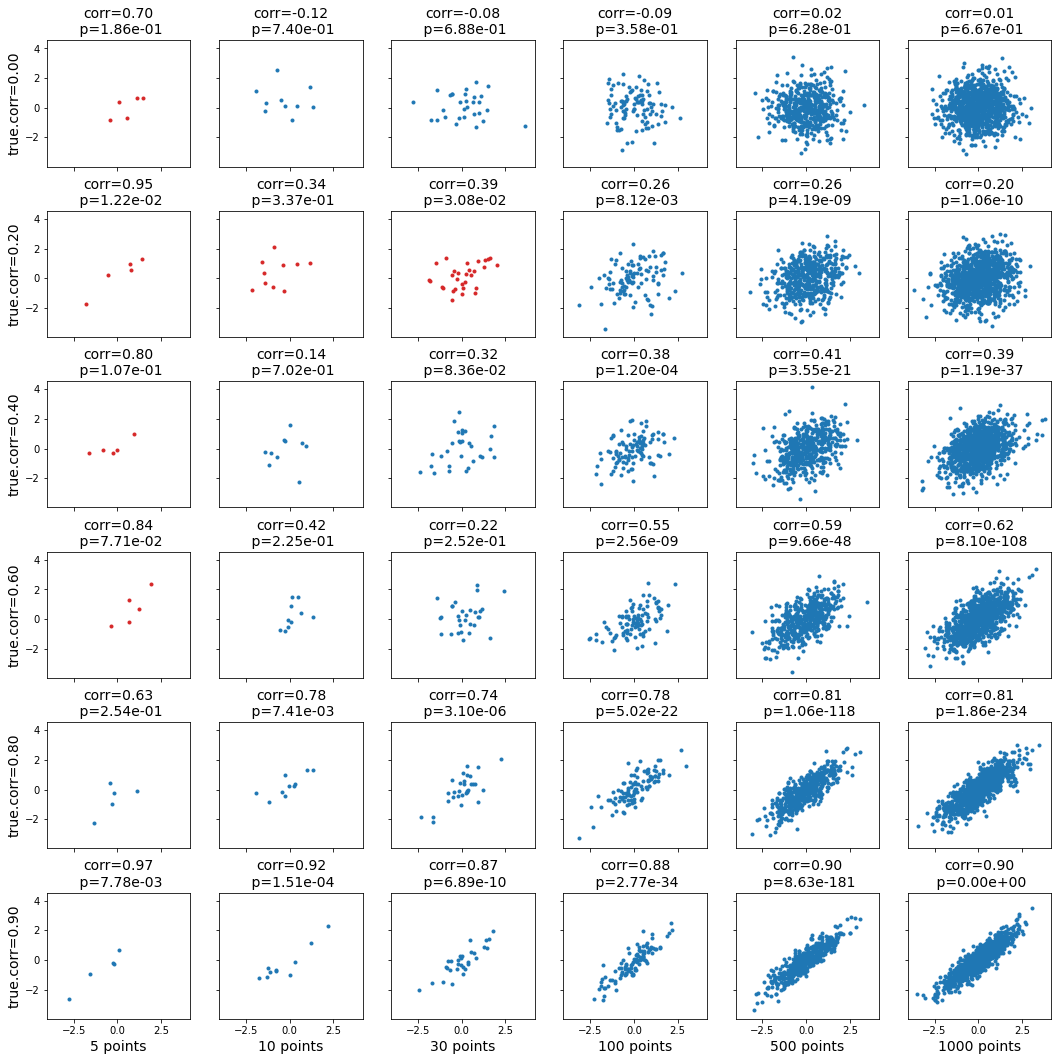

In [9]:
np.random.seed(2021)
nrows, ncols = len(rhos), len(ns)
fig, axs = plt.subplots(
    nrows, ncols, 
    figsize=(ncols * 3, nrows * 3), 
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0.35}, 
)
for i, rho in enumerate(rhos):
    for j, n in enumerate(ns):
        _x, _y = bi_normal_corr(n, rho)
        _corr = pearsonr(_x, _y)[0]
        ax = plot_scatters_with_corr(
            _x, _y, 
            c='tab:red' if (_corr - rho > 0.1) else 'tab:blue',
            ax=axs[i][j],
            xlabel='' if i < nrows - 1 else f'{n} points', 
            ylabel='' if j >= 1 else f'true.corr={rho:.2f}'
        )

## Non-linear correlations

<AxesSubplot:title={'center':'corr=0.09\n p=1.19e-01'}, xlabel='x'>

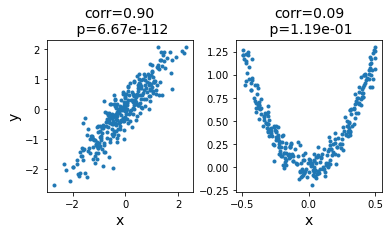

In [10]:
# example 3
n = 300
eps = 0.1
x, y = bi_normal_corr(n, 0.9)
x2 = np.random.rand(n) - 0.5
y2 = x2 ** 2 * 5 + np.random.randn(n) * eps
fig, axs = plt.subplots(1, 2, figsize=(6, 2.8), gridspec_kw={'wspace': 0.3})
plot_scatters_with_corr(x, y, ax=axs[0])
plot_scatters_with_corr(x2, y2, xlabel='x', ylabel='', ax=axs[1])

## Mixed distribution

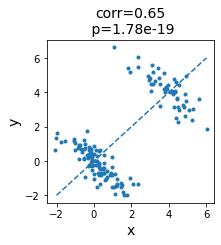

In [12]:
n1, n2 = 100, 50
shift = 4
x1, y1 = bi_normal_corr(n1, - 0.8)
x2, y2 = bi_normal_corr(n2, - 0.8)
x2, y2 = x2 + shift, y2 + shift
x, y = np.hstack([x1, x2]), np.hstack([y1, y2])
ax = plot_scatters_with_corr(x, y, )
ax.plot([-2, 6], [-2, 6], linestyle='--')

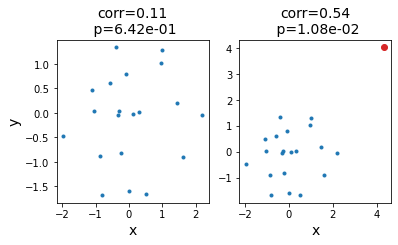

In [25]:
np.random.seed(21)
x1, y1 = bi_normal_corr(20, 0.2)
x2 = list(x1) + [max(x1) * 2]
y2 = list(y1) + [max(y1) * 3]
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_scatters_with_corr(x1, y1, ax=axs[0])
plot_scatters_with_corr(x2, y2, ax=axs[1], ylabel='')
axs[1].scatter(x2[-1], y2[-1], c='tab:red')

## Transformation

如何玩弄数据